**Consigne 'BASELINES'**

Développement d’une méthode baseline “aléatoire” qui prédit des étiquettes aléatoirement, calcul de la performance obtenue par cette méthode.

Évaluation d’une méthode baseline plus sophistiquée, par exemple: 
- la classe majoritaire, 
- la baseline proposée à l’époque par les organisateur.rice.s,
- ou l’exécution d’un système soumis par les participant.e.s en 2016.

# Travail précédent Wiwi

Vous pouvez réutiliser des parties

## Imports

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = '../Semantic_chunk_identification'
os.chdir(path)
%ls

 Le volume dans le lecteur E s'appelle DATA
 Le num‚ro de s‚rie du volume est C61F-A303

 R‚pertoire de E:\timot\Documents\1 - Centrale Marseille\0.6 - Semestre S9\0_PSTALN\TP\Semantic_chunk_identification

30/12/2021  15:14    <DIR>          .
30/12/2021  15:14    <DIR>          ..
17/12/2021  15:41               266 .gitignore
30/12/2021  15:12    <DIR>          .ipynb_checkpoints
30/12/2021  15:14           107ÿ913 PROJ-PSTALN Baselines.ipynb
17/12/2021  15:21                78 README.md
17/12/2021  15:29                25 requirements.txt
23/10/2015  14:49    <DIR>          train_2015_10_22.utf-8
               4 fichier(s)          108ÿ282 octets
               4 R‚p(s)  662ÿ275ÿ137ÿ536 octets libres


## Chargement et lecture des données

In [5]:
import re #Regular expressions operation

def readFile(filename):
    return [line.strip() for line in open(filename)]
#.decode("utf-8")

def readFileWithChunks(filename):
    lines_marked = [line.strip() for line in open(filename)]
    # .decode("utf-8")
    lines_clean1 = [line.replace('[ ', "") for line in lines_marked]
    lines_clean2 = [line.replace(' ]', "") for line in lines_clean1]
    return lines_clean2

In [6]:
path_headline1_chunked = '/content/drive/MyDrive/CENTRALE MARSEILLE/3A/PSTALN/Projet/Downloaded files/train_2015_10_22.utf-8/STSint.input.headlines.sent1.chunk.txt'
path_headline2_chunked = '/content/drive/MyDrive/CENTRALE MARSEILLE/3A/PSTALN/Projet/Downloaded files/train_2015_10_22.utf-8/STSint.input.headlines.sent2.chunk.txt'
path_headline1 = '/content/drive/MyDrive/CENTRALE MARSEILLE/3A/PSTALN/Projet/Downloaded files/train_2015_10_22.utf-8/STSint.input.headlines.sent1.txt'
path_headline2 = '/content/drive/MyDrive/CENTRALE MARSEILLE/3A/PSTALN/Projet/Downloaded files/train_2015_10_22.utf-8/STSint.input.headlines.sent2.txt'

lines_chunked = True  #False

if lines_chunked == True:
    sent1_lines = readFileWithChunks(path_headline1_chunked)
    sent2_lines = readFileWithChunks(path_headline2_chunked)
    sent1_lines_chunked = readFile(path_headline1_chunked)
    sent2_lines_chunked = readFile(path_headline2_chunked)
else:
    sent1_lines = readFile(path_headline1)
    sent2_lines = readFile(path_headline2)

if len(sent1_lines) != len(sent2_lines):
    print ("files have different number of lines... quiting")
    exit(-1)


In [7]:
idx = 3
print(sent1_lines[idx])
print(sent1_lines_chunked[idx])

Syria peace plan conditions " unacceptable , " opposition says
[ Syria peace plan conditions ] [ " ] [ unacceptable ] [ , ] [ " ] [ opposition ] [ says ]


## Baseline Aléatoire

In [ ]:
#Preprocessing
#Définition modèle approprié
#Prédiction parmis les 5 étiquettes
# Evaluation

## Identification des morceaux de phrases (‘chunks’) ayant chacun une unité de sens

>Utilisation des chunks déja définis dans le dataset 'chunked' (pour le moment)
> TODO : doit ont prédire les chunks à l'aide d'un modèle de ML ?

#### Preprocessing

In [ ]:
# Nettoyage du bruit
def removeNoise(line):
    noiseTokens = ['[', ']', ',', '.', ':', ';', '"', "'", "''", "`", "-",]
    for token in noiseTokens:
        line = line.replace(token, "")
    return line

# Passage en minuscule
def lowerCase(line):
    return line.lower()

# Séparation des phrases en mots
def splitSentence(line):
    return line.split(' ')

def preprocessPipeline(line):
    return splitSentence(lowerCase(removeNoise(line)))

#### Alignement des mots obtenus

In [ ]:
#Utilisation db WordNet ?

#### Extraits de code des baselines 'officielles'

In [ ]:
def extractChunksFromSentence(sentence):
    chunks = re.findall(r"\[[^\[]+\]", sentence)
    return chunks

############################################
################ MAIN SCRIPT ###############
############################################

lines_chunked = "True"
# lines_chunked = args['chunked']

if lines_chunked == "True":
    sent1_lines = readFileWithChunks(args['sent1'])
    sent2_lines = readFileWithChunks(args['sent2'])
    sent1_lines_chunked = readFile(args['sent1'])
    sent2_lines_chunked = readFile(args['sent2'])
else:
    sent1_lines = readFile(args['sent1'])
    sent2_lines = readFile(args['sent2'])

if len(sent1_lines) != len(sent2_lines):
    print "files have different number of lines... quiting"
    exit(-1)

for pair_id in range(len(sent1_lines)):
    sentence1 = sent1_lines[pair_id]
    sentence2 = sent2_lines[pair_id]

    sentence1Tokens = []
    index = 1
    for element in re.findall(r"[^ ]+", sentence1):
        sentence1Tokens.append([index, element, element])
        index += 1

    sentence2Tokens = []
    index = 1
    for element in re.findall(r"[^ ]+", sentence2):
        sentence2Tokens.append([index, element, element])
        index += 1

    idAlignments = findSameTokens(sentence1Tokens,sentence2Tokens)

    sentence1Chunks = []
    sentence2Chunks = []
    sentence1TokensChunk = []
    sentence2TokensChunk = []

    if lines_chunked == "True":
        sentence1Chunks = extractChunksFromSentence(sent1_lines_chunked[pair_id])
        sentence2Chunks = extractChunksFromSentence(sent2_lines_chunked[pair_id])
    else:       
        sentence1Chunks = extractChunksFromIxaPipes(sentence1Tokens)
        sentence2Chunks = extractChunksFromIxaPipes(sentence2Tokens)

    #TODO comprendre utilité findTokensForChunk
    sentence1TokensChunk = findTokensForChunk(sentence1Chunks, sentence1Tokens)
    sentence2TokensChunk = findTokensForChunk(sentence2Chunks, sentence2Tokens)

    token2tokenLinkMatrix = createToken2tokenLinkMatrix(sentence1TokensChunk, sentence2TokensChunk, idAlignments)
    chunk2chunkLinkMatrix = createChunk2chunkLinkMatrix(sentence1TokensChunk, sentence2TokensChunk, token2tokenLinkMatrix)

    #Définition des relations entre Tokens et relations entre Chunks
    Sentence1_NotAlignable_tokens = getNotAlignableTokenIds(sentence1Tokens, sentence1TokensChunk)
    Sentence2_NotAlignable_tokens = getNotAlignableTokenIds(sentence2Tokens, sentence2TokensChunk)
    
    Sentence1_NotAlignable_chunks = getChunksForNotAlignableTokens(Sentence1_NotAlignable_tokens)
    Sentence2_NotAlignable_chunks = getChunksForNotAlignableTokens(Sentence2_NotAlignable_tokens)

    Sentence1_NotLinked_chunks = getNotLinkedChunkIdsSentence1(chunk2chunkLinkMatrix, sentence1TokensChunk)
    Sentence2_NotLinked_chunks = getNotLinkedChunkIdsSentence2(chunk2chunkLinkMatrix, sentence2TokensChunk)

    Sentence1_Linked_chunks = getLinkedChunkIdsSentence1(chunk2chunkLinkMatrix, sentence1TokensChunk)
    Sentence2_Linked_chunks = getLinkedChunkIdsSentence2(chunk2chunkLinkMatrix, sentence2TokensChunk)
   
    Sentence1_Noali_Tokens = Sentence1_NotAlignable_tokens + chunkIds2TokenIds(Sentence1_NotLinked_chunks, sentence1TokensChunk)
    Sentence2_Noali_Tokens = Sentence2_NotAlignable_tokens + chunkIds2TokenIds(Sentence2_NotLinked_chunks, sentence2TokensChunk)

    chunk2chunkReducedLinkMatrix = createChunk2chunkReducedLinkMatrix(chunk2chunkLinkMatrix, Sentence1_Linked_chunks, sentence1TokensChunk, Sentence2_Linked_chunks, sentence2TokensChunk)
    cleanMatrix = cleanEpsilons(chunk2chunkReducedLinkMatrix)
    LinkCostMatrix = munkres.make_cost_matrix(cleanMatrix, lambda cost: 100 - cost)
    hungarianMunkres = Munkres()
    
    try:
        bestIndexes = hungarianMunkres.compute(LinkCostMatrix)
    except:
        bestIndexes = []

    MaximunRelatedChunkIds = getMaximunRelatedChunkIds(bestIndexes, Sentence1_Linked_chunks, Sentence2_Linked_chunks)
    OtherRelatedChunkIds = getOtherRelatedChunkIds(chunk2chunkReducedLinkMatrix, bestIndexes, Sentence1_Linked_chunks, Sentence2_Linked_chunks)
    OtherRelatedChunkIdsSentence1 = OtherRelatedChunkIds[0]
    OtherRelatedChunkIdsSentence2 = OtherRelatedChunkIds[1]

    S1AlignmentControl = {}
    S2AlignmentControl = {}

    print '<sentence id="' + str(pair_id+1) + '" status="">'
    print '// ' + sentence1.encode("utf-8")
    print '// ' + sentence2.encode("utf-8")
    print '<source>'
    for item in sentence1Tokens:
        print str(item[0]) + " " + item[1].encode("utf-8") + " : "
        S1AlignmentControl[item[0]] = False
    print '</source>'
    print '<translation>'
    for item in sentence2Tokens:
        print str(item[0]) + " " + item[1].encode("utf-8") + " : "
        S2AlignmentControl[item[0]] = False
    print '</translation>'
    print '<alignment>'

    writeMaximunRelatedChunkIds(MaximunRelatedChunkIds, sentence1TokensChunk, sentence2TokensChunk)
    writeOtherRelatedChunkIds(OtherRelatedChunkIdsSentence1, OtherRelatedChunkIdsSentence2, sentence1TokensChunk, sentence2TokensChunk)
    writeAllNotLinkedChunkIds(Sentence1_NotLinked_chunks,Sentence2_NotLinked_chunks, sentence1TokensChunk, sentence2TokensChunk)
    writeAllNotAlignableTokenIds(Sentence1_NotAlignable_tokens, Sentence2_NotAlignable_tokens)

    sentence1_forgottens = []

    for key in S1AlignmentControl.keys():
        if S1AlignmentControl[key] == False:
            sentence1_forgottens.append(int(key))

    sentence2_forgottens = []

    for key in S2AlignmentControl.keys():
        if S2AlignmentControl[key] == False:
            sentence2_forgottens.append(int(key))

    writeAllForgottenTokenIds(sentence1_forgottens, sentence2_forgottens, sentence1Tokens, sentence2Tokens)

    print '</alignment>'
    print
    print


# TODO

Ou mettre les embeddings

- POS tagging (Tim)
> utilisation modèle entrainé ?
- Chunking (wiwi)
> BIO encoding (si nécessaire aléatoire)
> utilisations de regles fixes définies
- Alignement (Maxime)

# POS Tagging

# Chunking

- Essai pred aléatoire
- Essai entrainement a partir des phrases chunkées

#### Chargement données

In [119]:
path_headline1_chunked = '/content/drive/MyDrive/CENTRALE MARSEILLE/3A/PSTALN/Projet/Downloaded files/train_2015_10_22.utf-8/STSint.input.headlines.sent1.chunk.txt'
path_headline2_chunked = '/content/drive/MyDrive/CENTRALE MARSEILLE/3A/PSTALN/Projet/Downloaded files/train_2015_10_22.utf-8/STSint.input.headlines.sent2.chunk.txt'
path_headline1 = '/content/drive/MyDrive/CENTRALE MARSEILLE/3A/PSTALN/Projet/Downloaded files/train_2015_10_22.utf-8/STSint.input.headlines.sent1.txt'
path_headline2 = '/content/drive/MyDrive/CENTRALE MARSEILLE/3A/PSTALN/Projet/Downloaded files/train_2015_10_22.utf-8/STSint.input.headlines.sent2.txt'


sent1_lines = readFileWithChunks(path_headline1_chunked)
sent2_lines = readFileWithChunks(path_headline2_chunked)
sent1_lines_chunked = readFile(path_headline1_chunked)
sent2_lines_chunked = readFile(path_headline2_chunked)

Train Test split

In [121]:
trainSamples = sent1_lines
trainSamplesChunked = sent1_lines_chunked

testSamples = sent2_lines
testSamplesChunked = sent2_lines_chunked

print('Train size:', len(trainSamples))
print('Test size:', len(testSamples))

Train size: 756
Test size: 756


#### Embedding temporaire

> attente embed mouss

Inspiré de : https://keras.io/examples/nlp/pretrained_word_embeddings/

In [1]:
#On suppose que l'embedding est disponible (voire préentrainé si possible) : cf Mouss

import numpy as np
import tensorflow as tf
from tensorflow import keras

Creation vocabulaire indexes

In [8]:
from tensorflow.keras.layers import TextVectorization

vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=200)
text_ds = tf.data.Dataset.from_tensor_slices(trainSamples).batch(128)
vectorizer.adapt(text_ds)

In [9]:
vectorizer.get_vocabulary()[:5]

['', '[UNK]', 'in', 'to', 'on']

In [11]:
output = vectorizer([["the cat sat on the mat"]])
output.numpy()[0, :6]
#Dans cette phrase test : 3 mots ne font pas partie du voc de notre db et sont donc '<UNK>'

array([17,  1,  1,  4, 17,  1])

In [12]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [13]:
test = ["the", "cat", "sat", "on", "the", "mat"]
[word_index[w] for w in test]

KeyError: ignored

Download GloVe embeddings

In [2]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2021-12-30 07:33:23--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-12-30 07:33:23--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-12-30 07:33:24--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [15]:
# path_to_glove_file = os.path.join(
#     os.path.expanduser("~"), ".keras/datasets/glove.6B.100d.txt"
# )
path_to_glove_file = '/content/glove.6B.100d.txt'

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [16]:
num_tokens = len(voc) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 2075 words (58 misses)


#### Preprocessing

> y_train / y_test

##### Definition méthodes

In [96]:
def removeNoise(line):
    noiseTokens = ['[', ']', ',', '.', ':', ';', '"', "'", "''", "`", "-",]
    for token in noiseTokens:
        line = line.replace(token, "")
    return line


def chunkedLine2ListChunks(line):
    line = removeNoise(line)
    line = line.split('  ') #Ca c'est de la bidouille mais ça marchera eheh
    for chunk in line:
    if len(chunk)==0: 
        while chunk in line:
            del line[line.index(chunk)]
    return line


def isInsideChunk(word, chunk):
    """
    Returns True if word have to be encoded as a O (BIO)
    Else False
    """
    return word in chunk

# ex = sent1_lines_chunked[0]
# l = chunkedLine2ListChunks(ex)
# print("Nazi" in l[0])
# print(isInsideChunk("Nazi", l[0]))


def isFirstChunkWord(word, chunk):
    """
    On suppose que le mot est présent dans le chunk

    Returns True if word have to be encoded as a B (BIO)
    Else False if word have to be encoded as a I (BIO)
    """
    chunk = chunk.split()
    return chunk[0] == word

# isFirstChunkWord("Nazi", l[0])

def wordBIOencoding(word, chunk):
    if isInsideChunk(word, chunk):
        if isFirstChunkWord(word, chunk): return 'B'
        else : return 'I'
    else : return 'O'

def sentenceBIOencoding(line, chunkedLine):
    '''
    La pertinence du 'O' n'est pas évidente ici étant donné que tous les mots de line semblent faire partie d'un chunk de chunkedLine
    '''

    words = line.split()
    chunks = chunkedLine2ListChunks(chunkedLine)
    BIOcodes = []

    currentChunk = 0

    for word in words:
        code = wordBIOencoding(word, chunks[currentChunk])

        if code == 'O':
            if currentChunk+1<len(chunks):
                currentChunk+=1 #Attention on explore le chunk suivant (si jamais c'est le début d'un autre chunk)
                test_code = wordBIOencoding(word, chunks[currentChunk])
                if test_code == 'B':
                    code = test_code

        BIOcodes.append(code)
    return BIOcodes


# for idx in range(3):
#   ex = sent1_lines_chunked[idx]
#   print(ex)
#   l = chunkedLine2ListChunks(ex)
#   print(l)
#   print()


# nbSamples = 3 #len(sent1_lines)
# for line, chunkedLine in zip(sent1_lines[:nbSamples], sent1_lines_chunked[:nbSamples]):
#   BIOcodes = sentenceBIOencoding(line, chunkedLine)
#   print(line.split())
#   print(BIOcodes)
#   print(chunkedLine)
#   print()

##### Execution

BIO encoding

In [166]:
BIO_y_train = []  #Contains BIO codes
BIO_y_test = []

nbSamples = len(trainSamples)
for line, chunkedLine in zip(trainSamples[:nbSamples], trainSamplesChunked[:nbSamples]):
    BIOcodes = sentenceBIOencoding(line, chunkedLine)
    BIO_y_train.append(BIOcodes)

nbSamples = len(testSamples)
for line, chunkedLine in zip(testSamples[:nbSamples], testSamplesChunked[:nbSamples]):
    BIOcodes = sentenceBIOencoding(line, chunkedLine)
    BIO_y_test.append(BIOcodes)

print(len(trainSamples), len(BIO_y_train))
print(trainSamplesChunked[0])
print(BIO_y_train[0])

756 756
[ Former Nazi death camp guard Demjanjuk ] [ dead ] [ at 91 ]
['B', 'I', 'I', 'I', 'I', 'I', 'B', 'B', 'I']


Conversion caractères BIO en entiers

In [167]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
labelEncoder.fit(['B', 'I', 'O'])
print(labelEncoder.transform(['B', 'I', 'O']))

[0 1 2]


In [168]:
BIO_int_y_train = []
BIO_int_y_test = []

for line in BIO_y_train:
    BIO_int_y_train.append(labelEncoder.transform(np.array(line)))

for line in BIO_y_test:
    BIO_int_y_test.append(labelEncoder.transform(np.array(line)))

print(trainSamplesChunked[0])
print(BIO_y_train[0])
print(BIO_int_y_train[0])

[ Former Nazi death camp guard Demjanjuk ] [ dead ] [ at 91 ]
['B', 'I', 'I', 'I', 'I', 'I', 'B', 'B', 'I']
[0 1 1 1 1 1 0 0 1]


Conservion One Hot 

In [169]:
from keras.utils import np_utils

y_train = []  #One hot encoded
y_test = []

for line in BIO_int_y_train:
    y_train.append(np_utils.to_categorical(line, num_classes=3))

for line in BIO_int_y_test:
    y_test.append(np_utils.to_categorical(line, num_classes=3))

print(trainSamplesChunked[0])
print(BIO_y_train[0])
print(BIO_int_y_train[0])
print(y_train[0])

[ Former Nazi death camp guard Demjanjuk ] [ dead ] [ at 91 ]
['B', 'I', 'I', 'I', 'I', 'I', 'B', 'B', 'I']
[0 1 1 1 1 1 0 0 1]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


Conversion format input X

In [226]:
def preprocessLines(lines):
    return np.array(vectorizer(np.array([[s] for s in lines])))
    # np.asrray(vectorizer(np.array([[s] for s in lines]))).astype('float32')#.numpy()

x_train = preprocessLines(trainSamples)
x_test = preprocessLines(testSamples)

print(x_train.shape)
print(x_test.shape)

(756, 200)
(756, 200)


Conversion format input Y

> On complète le nombre de prédictions attendues pour en avoir le même nombre que de môts dans un sample de X (paddings INCLUS)

In [182]:
predictionForPaddingWord = [0, 0, 2]  # = 'O'
lenSentence = x_train.shape[1]

def completeLineLabels(lineLabels, lenSentence):
    '''
    Add 'O' labels for Padding words
    '''
    nbWordsInSample = len(lineLabels)
    nbPaddingLabelsToAdd = lenSentence-nbWordsInSample

    paddingLabels = np.array([predictionForPaddingWord for i in range(nbPaddingLabelsToAdd)])
    lineLabels = np.concatenate((lineLabels,paddingLabels))

    return lineLabels

#Test
y = np.array(completeLineLabels(y_train[0], 200))
print(y.shape)

(200, 3)


In [183]:
# y_train = np.array(y_train)
y_train = np.array([np.array(completeLineLabels(line_labels, lenSentence)) for line_labels in y_train])
# y_test = np.array(y_test)
y_test = np.array([np.array(completeLineLabels(line_labels, lenSentence)) for line_labels in y_test])

print(y_train.shape)
print("Sample size", y_train[0].shape)
# print(y_test.shape)

(756, 200, 3)
Sample size (200, 3)


#####Recherche / construction fonction preprocess

>a supprimer plus tard

In [70]:
#TEST

idx = 3
# print(sent1_lines[idx])
# print(sent1_lines_chunked[idx])
# print(sent1_lines_chunked[idx][0])


ex = sent1_lines_chunked[idx]
# ex = ex.split("] [")
# print(ex)
# ex = [chunk.replace('[ ', "") for chunk in ex]
# ex = [chunk.replace(' ]', "") for chunk in ex]
# print(ex)

ex2 = sent1_lines_chunked[idx]
ex2 = removeNoise(ex2)
print('\n',ex2)
# print(ex2.strip()[0])
ex2 = ex2.split('  ')
print('\n',ex2)


# mask = [len(chunk)!=0 for chunk in ex2]
# print(mask)
# ex2 = ex2[mask]

# print(ex2[-2])
for i, chunk in enumerate(ex2):
    print(i, chunk)
    if len(chunk)==0: 
        while chunk in ex2:
            # del ex2[ex2.index(chunk)]
            del ex2[ex2.index(chunk)]
            #ex2.remove(chunk)
print(ex2)
print('\n', chunkedLine2ListChunks(ex))


# print(ex2[0])
# print(ex2[1])
# print(len(ex2[2]))
# print(ex2[3])
# while "''" in ex2:
#   ex2.remove("''")
# print(ex2)
# print(ex2[0])
# print(ex2[1])



# lines_marked = [line.strip() for line in open(filename)]
# # .decode("utf-8")
# lines_clean1 = [line.replace('[ ', "") for line in lines_marked]
# lines_clean2 = [line.replace(' ]', "") for line in lines_clean1]


  Syria peace plan conditions      unacceptable         opposition   says 

 [' Syria peace plan conditions', '', '', 'unacceptable', '', '', '', ' opposition', ' says ']
0  Syria peace plan conditions
1 
2  opposition
3  says 
[' Syria peace plan conditions', 'unacceptable', ' opposition', ' says ']

 [' Syria peace plan conditions', 'unacceptable', ' opposition', ' says ']


#### Modèle tagging : Simple RNN

In [208]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Embedding, Input

nbClasses = 3 #BIO

# SimpleRNN model
model = Sequential()
model.add(Input(shape=(None,), dtype="int64"))  #integer_sequences_input
model.add(Embedding(
    input_dim=num_tokens, #Size of the vocabulary
    output_dim=embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False #Don't want to update embeddings
                    ))
model.add(SimpleRNN(units=nbClasses, #dim hidden state returned
                    activation="softmax", #'tanh'
                    return_sequences=True
                    )) #return_sequences=False pour obtenir uniquement la derniere couche RNN
# model.add(Dense(nbClasses))

#We use categorical crossentropy as our loss since we're doing softmax classification. Moreover, we use sparse_categorical_crossentropy since our labels are integers.
#sparse_
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["acc"])
# model.compile(optimizer = 'adam', loss='mean_squared_error')


model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 100)         213500    
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, None, 3)           312       
                                                                 
Total params: 213,812
Trainable params: 312
Non-trainable params: 213,500
_________________________________________________________________


Entrainement

In [301]:
# pred = model.predict(np.array([x_train[0]]))

# pred = model.predict(x_train[:2])
# print(pred[0][:3])
# print(y_train[0][:3])

# print()
# print(pred.shape)
# print(y_train[:2].shape)

In [306]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=2, validation_data=(x_test, y_test))

Epoch 1/50
24/24 - 1s - loss: 0.1047 - acc: 0.9853 - val_loss: 0.1153 - val_acc: 0.9825 - 1s/epoch - 46ms/step
Epoch 2/50
24/24 - 1s - loss: 0.0992 - acc: 0.9853 - val_loss: 0.1102 - val_acc: 0.9825 - 1s/epoch - 44ms/step
Epoch 3/50
24/24 - 1s - loss: 0.0941 - acc: 0.9854 - val_loss: 0.1056 - val_acc: 0.9825 - 1s/epoch - 44ms/step
Epoch 4/50
24/24 - 1s - loss: 0.0895 - acc: 0.9854 - val_loss: 0.1013 - val_acc: 0.9825 - 1s/epoch - 44ms/step
Epoch 5/50
24/24 - 1s - loss: 0.0853 - acc: 0.9855 - val_loss: 0.0976 - val_acc: 0.9825 - 1s/epoch - 44ms/step
Epoch 6/50
24/24 - 1s - loss: 0.0814 - acc: 0.9854 - val_loss: 0.0940 - val_acc: 0.9825 - 1s/epoch - 44ms/step
Epoch 7/50
24/24 - 1s - loss: 0.0779 - acc: 0.9854 - val_loss: 0.0909 - val_acc: 0.9826 - 1s/epoch - 44ms/step
Epoch 8/50
24/24 - 1s - loss: 0.0746 - acc: 0.9855 - val_loss: 0.0880 - val_acc: 0.9826 - 1s/epoch - 44ms/step
Epoch 9/50
24/24 - 1s - loss: 0.0717 - acc: 0.9856 - val_loss: 0.0853 - val_acc: 0.9826 - 1s/epoch - 44ms/step
E

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


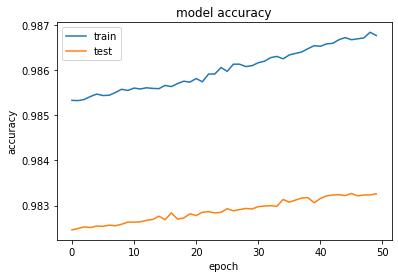

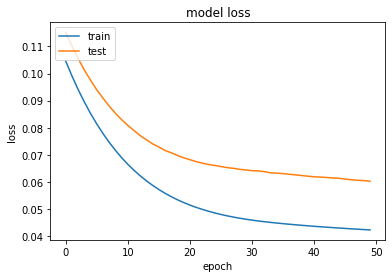

In [307]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Evaluation

In [222]:
def getBatchAccuracy(y_pred, y_true):
    '''
    Input
    -----
    Batch labels hot encoded of dimension batch_size x 200 x 3
    '''
    assert len(y_pred.shape) == len(y_true.shape) == 3 

    sum_acc = 0
    for i in range(len(y_pred)):
        sum_acc += getSampleAccuracy(y_pred[i], y_true[i])  #Attention ici on ne défini pas une prédiction de chunking de phrase uniquement comme correcte ou non, mais possiblement partiellement correcte
    return sum_acc / len(y_pred)


def getSampleAccuracy(y_sample_pred, y_sample_true):
    '''
    Input
    -----
    Sentence/Sample labels hot encoded of dimension 200 x 3
    '''
    assert len(y_sample_pred.shape) == len(y_sample_true.shape) == 2

    pred_labels_integers = np.argmax(y_sample_pred, axis=1)
    true_labels_integers = np.argmax(y_sample_true, axis=1)

    true_counts = 0
    for i in range(len(pred_labels_integers)):
        if true_labels_integers[i] == pred_labels_integers[i]:
            true_counts +=1
    return true_counts/len(pred_labels_integers)

In [223]:
y_pred = model.predict(x_test)

acc = getBatchAccuracy(y_pred=y_pred, y_true=y_test)
print(acc)

0.9824537037037131


#### Final : Construction de phrases 'chunkées' à partir de phrases non-chunkées

In [299]:
def startChunk(word):
    return '[ ' + word

def endChunk(word):
    return word + ' ]'

def chunkLine(line, line_labels_integers, showErrors):

    new_line = line.split()
    previous_label = -1

    i = -1
    for word, label in zip(
                        line.split(),
                        line_labels_integers[:len(line.split())]
                        ):  #enumerate ne fonctionne pas jsp pk :(
    i +=1
    # print(label)
    if label == 0:  #"B"
        new_line[i] = startChunk(word)
        if previous_label == 1 or previous_label == 0:
            new_line[i-1] = endChunk(new_line[i-1])
        previous_label = 0

    if label == 2:  #'O'
        if previous_label == 0 or previous_label== 1:
            new_line[i-1] = endChunk(new_line[i-1])
        previous_label = 2

    if label == 1 : #'I'
        if previous_label == 2: 
            if showErrors : print(f"Oups il y a eu une erreur de classification du mot '{word}' dans la phrase \n {line}\n")
        if previous_label == -1:  #Problème de prédiction d'un I en début de phrase pour des noms propres ...
            if showErrors : print(f"Erreur début de phrase : '{word}'\n {line}\n")
            new_line[i] = startChunk(word)  #TODO : comment faire pour ne pas tricher comme ça ?
        previous_label = 1

    if i == len(line.split()) - 1:  #Fin de phrase
        if label == 0 or label == 1: # 'B' ou 'I'
            new_line[i] = endChunk(word)
    
    separator = ' '
    new_line = separator.join(new_line)
    return new_line

def chunkDataset(lines, showErrors=False):

    #Preprocess 'lines' pour prédictions
    x= preprocessLines(lines)

    y_pred = model.predict(x)
    lines_labels_integers = np.argmax(y_pred, axis=2)

    chunkedLines = []

    for line, line_labels_integers in zip(lines, lines_labels_integers):
        chunkedLines.append(chunkLine(line, line_labels_integers, showErrors))

    return chunkedLines

In [308]:
chunkedLines = chunkDataset(testSamples, showErrors=False)
nb = 3

#Pour affichage uniquement
x= preprocessLines(testSamples)
y_pred = model.predict(x)
lines_labels_integers = np.argmax(y_pred, axis=2)

for line, trueChunkedLine, chunkedLine, lineLabels in zip(testSamples[:nb], testSamplesChunked[:nb], chunkedLines[:nb], lines_labels_integers[:nb]):
    print('Line : \t\t\t\t', line)
    print('True chunked line : \t\t', trueChunkedLine)
    print('Predicted chunked line : \t', chunkedLine)
    print('Predicted labels : \t\t', lineLabels[:len(line.split())])
    print()

Line : 				 John Demjanjuk , convicted Nazi death camp guard , dies aged 91
True chunked line : 		 [ John Demjanjuk ] [ , ] [ convicted Nazi death camp guard ] [ , ] [ dies ] [ aged 91 ]
Predicted chunked line : 	 [ John Demjanjuk ] [ , convicted ] [ Nazi death camp ] [ guard ] , dies aged 91
Predicted labels : 		 [0 1 0 1 0 1 1 0 2 2 2 2]

Line : 				 Saudi Women Allowed To Compete At Olympics
True chunked line : 		 [ Saudi Women ] [ Allowed ] [ To Compete ] [ At Olympics ]
Predicted chunked line : 	 [ Saudi Women ] Allowed [ To Compete ] [ At Olympics ]
Predicted labels : 		 [0 1 2 0 1 0 1]

Line : 				 Drone strike kills four suspected militants in Pakistan
True chunked line : 		 [ Drone strike ] [ kills ] [ four suspected militants ] [ in Pakistan ]
Predicted chunked line : 	 [ Drone strike ] [ kills ] [ four ] [ suspected ] [ militants ] [ in Pakistan ]
Predicted labels : 		 [0 1 0 0 0 0 0 1]



# Alignement